In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score,silhouette_samples

In [2]:
deg_df = pd.read_csv('C:/JK/Masters Studies/Fall 2017/KDD/Clustering/Dataset/deg.csv')
deg_df.head()

,Unnamed: 0,Undergraduate.Major,Starting.Median.Salary,Mid.Career.Median.Salary,Percent.change.from.Starting.to.Mid.Career.Salary,Mid.Career.10th.Percentile.Salary,Mid.Career.25th.Percentile.Salary,Mid.Career.75th.Percentile.Salary,Mid.Career.90th.Percentile.Salary
0,1,Accounting,46000,77100,67.6,42200,56100,108000.0,152000
1,2,Aerospace Engineering,57700,101000,75.0,64300,82100,127000.0,161000
2,3,Agriculture,42600,71900,68.8,36300,52100,96300.0,150000
3,4,Anthropology,36800,61500,67.1,33800,45500,89300.0,138000
4,5,Architecture,41600,76800,84.6,50600,62200,97000.0,136000


In [3]:
deg = deg_df.drop("Unnamed: 0",axis=1)

In [4]:
deg.head()

,Undergraduate.Major,Starting.Median.Salary,Mid.Career.Median.Salary,Percent.change.from.Starting.to.Mid.Career.Salary,Mid.Career.10th.Percentile.Salary,Mid.Career.25th.Percentile.Salary,Mid.Career.75th.Percentile.Salary,Mid.Career.90th.Percentile.Salary
0,Accounting,46000,77100,67.6,42200,56100,108000.0,152000
1,Aerospace Engineering,57700,101000,75.0,64300,82100,127000.0,161000
2,Agriculture,42600,71900,68.8,36300,52100,96300.0,150000
3,Anthropology,36800,61500,67.1,33800,45500,89300.0,138000
4,Architecture,41600,76800,84.6,50600,62200,97000.0,136000


In [5]:
# deg_norm = (deg - deg.mean()) / (deg.max() - deg.min())

In [6]:
deg1 = deg.drop("Undergraduate.Major",axis=1)
deg1.head()

,Starting.Median.Salary,Mid.Career.Median.Salary,Percent.change.from.Starting.to.Mid.Career.Salary,Mid.Career.10th.Percentile.Salary,Mid.Career.25th.Percentile.Salary,Mid.Career.75th.Percentile.Salary,Mid.Career.90th.Percentile.Salary
0,46000,77100,67.6,42200,56100,108000.0,152000
1,57700,101000,75.0,64300,82100,127000.0,161000
2,42600,71900,68.8,36300,52100,96300.0,150000
3,36800,61500,67.1,33800,45500,89300.0,138000
4,41600,76800,84.6,50600,62200,97000.0,136000


In [7]:
df_norm = (deg1 - deg1.mean()) / (deg1.max() - deg1.min())

In [8]:
df_norm.head()

,Starting.Median.Salary,Mid.Career.Median.Salary,Percent.change.from.Starting.to.Mid.Career.Salary,Mid.Career.10th.Percentile.Salary,Mid.Career.25th.Percentile.Salary,Mid.Career.75th.Percentile.Salary,Mid.Career.90th.Percentile.Salary
0,0.041935,0.042073,-0.020899,-0.026726,0.002205,0.078685,0.081285
1,0.332258,0.476618,0.071486,0.462212,0.514016,0.333718,0.160511
2,-0.042432,-0.052473,-0.005918,-0.157257,-0.076535,-0.078362,0.063680
3,-0.186352,-0.241564,-0.027141,-0.212566,-0.206457,-0.172322,-0.041954
4,-0.067246,0.036618,0.191336,0.159115,0.122283,-0.068966,-0.059560


In [9]:
deg_np = df_norm.as_matrix()
deg_np.itemsize

8

In [10]:
kmeans = KMeans(n_clusters=2, random_state=570).fit(deg_np)
kmeans.labels_

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0])

In [11]:
centers=kmeans.cluster_centers_
centers

array([[-0.14380112, -0.23092391, -0.09270726, -0.18069158, -0.20507145,
        -0.21219289, -0.16509585],
       [ 0.16881001,  0.27108458,  0.10883027,  0.2121162 ,  0.24073605,
         0.249096  ,  0.19380818]])

In [12]:
kmeans_transform = KMeans(n_clusters=2, random_state=570).fit_transform(deg_np, y=None)

In [13]:
kmeans_transform

array([[ 0.57110763,  0.49093516],
       [ 1.44521893,  0.46460034],
       [ 0.37009798,  0.72369845],
       [ 0.1549006 ,  1.01042096],
       [ 0.64218489,  0.54745151],
       [ 0.30185987,  1.10479115],
       [ 0.17507918,  0.89675851],
       [ 0.39484265,  0.67364291],
       [ 1.82798382,  0.82007841],
       [ 0.69712447,  0.43873122],
       [ 1.15631995,  0.34623624],
       [ 0.40038094,  0.78174778],
       [ 1.58881942,  0.60784332],
       [ 1.18781588,  0.25366428],
       [ 1.07113454,  0.19571298],
       [ 0.23995581,  1.26776379],
       [ 0.31223362,  1.13600223],
       [ 1.50505877,  0.59317259],
       [ 0.4184899 ,  1.4498444 ],
       [ 1.58044752,  0.60862206],
       [ 0.17381372,  0.96776449],
       [ 0.33899482,  0.88146577],
       [ 1.11320222,  0.35286502],
       [ 0.21777508,  1.06774066],
       [ 0.19182018,  0.87511356],
       [ 0.65187364,  0.45781159],
       [ 0.16898488,  1.14144991],
       [ 0.23916365,  1.20106951],
       [ 0.43520842,

In [14]:
kmeans_predict = kmeans.predict(deg_np)
kmeans_predict

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0])

In [15]:
print(kmeans.score(X=deg_np))

-9.6578829611


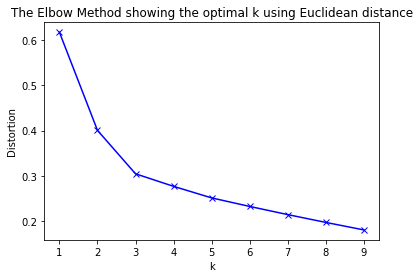

In [16]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(deg_np)
    kmeanModel.fit(deg_np)
    distortions.append(sum(np.min(cdist(deg_np, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / deg_np.shape[0])
 
# Plot the elbow
plt.plot(K, distortions,'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k using Euclidean distance')
plt.show()

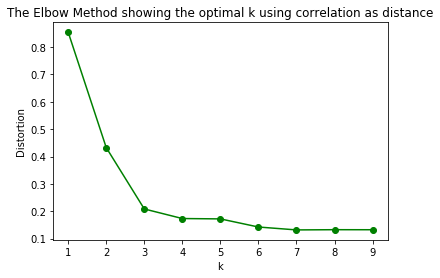

In [17]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(deg_np)
    kmeanModel.fit(deg_np)
    distortions.append(sum(np.min(cdist(deg_np, kmeanModel.cluster_centers_,'correlation'), axis=1)) / deg_np.shape[0])
 
# Plot the elbow
plt.plot(K, distortions,'go-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k using correlation as distance')
plt.show()

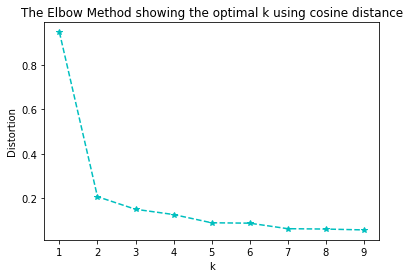

In [18]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(deg_np)
    kmeanModel.fit(deg_np)
    distortions.append(sum(np.min(cdist(deg_np, kmeanModel.cluster_centers_,metric='cosine'), axis=1)) / deg_np.shape[0])
 
# Plot the elbow
plt.plot(K, distortions,'c*--')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k using cosine distance')
plt.show()

50


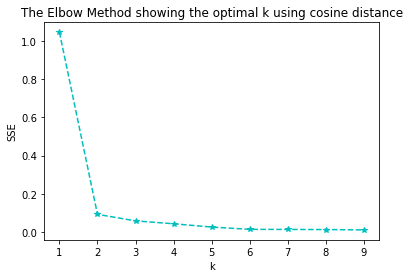

In [19]:
# k means determine k
print(deg_np.shape[0])
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(deg_np)
    kmeanModel.fit(deg_np)
    distortions.append(sum(np.min(np.square(cdist(deg_np, kmeanModel.cluster_centers_,metric='cosine')), axis=1) / deg_np.shape[0]))

# Plot the elbow
plt.plot(K, distortions,'c*--')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k using cosine distance')
plt.show()

50
SSE for 1 is 23.1335511646
SSE for 2 is 9.6578829611
SSE for 3 is 5.81876047515
SSE for 4 is 4.64387463729
SSE for 5 is 3.91160751454
SSE for 6 is 3.26958845202
SSE for 7 is 2.88607447322
SSE for 8 is 2.33581763981
SSE for 9 is 1.91696808529


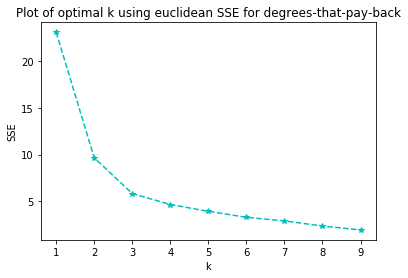

In [40]:
# k means determine k
print(deg_np.shape[0])
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(deg_np)
    kmeanModel.fit(deg_np)
#     print(k+kmeanModel.cluster_centers_)
    distortions.append(sum(np.min(np.square(cdist(deg_np, kmeanModel.cluster_centers_,metric='euclidean')), axis=1)))
    print("SSE for " +str(k)+" is "+str(sum(np.min(np.square(cdist(deg_np, kmeanModel.cluster_centers_,metric='euclidean')), axis=1))))
# Plot the elbow
plt.plot(K, distortions,'c*--')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Plot of optimal k using euclidean SSE for degrees-that-pay-back')
plt.show()

50
SSE for 1 is 52.254470966
SSE for 2 is 4.65079816611
SSE for 3 is 2.93638407283
SSE for 4 is 2.28066635583
SSE for 5 is 1.32529378069
SSE for 6 is 1.29748458724
SSE for 7 is 0.703660259186
SSE for 8 is 0.490218735885
SSE for 9 is 0.400375223511


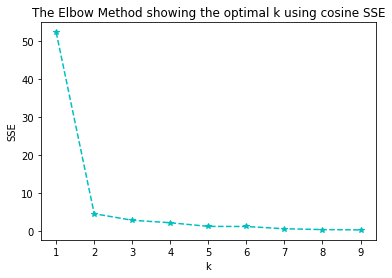

In [21]:
# k means determine k
print(deg_np.shape[0])
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(deg_np)
    kmeanModel.fit(deg_np)
#     print(k+kmeanModel.cluster_centers_)
    distortions.append(sum(np.min(np.square(cdist(deg_np, kmeanModel.cluster_centers_,metric='cosine')), axis=1)))
    print("SSE for " +str(k)+" is "+str(sum(np.min(np.square(cdist(deg_np, kmeanModel.cluster_centers_,metric='cosine')), axis=1))))
# Plot the elbow
plt.plot(K, distortions,'c*--')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k using cosine SSE')
plt.show()

50
SSE for 1 is 57.5155405829
SSE for 2 is 11.9337063129
SSE for 3 is 3.87146788085
SSE for 4 is 2.67031616623
SSE for 5 is 2.79491919255
SSE for 6 is 1.96667165774
SSE for 7 is 1.79169866742
SSE for 8 is 1.97733605247
SSE for 9 is 1.61851991749


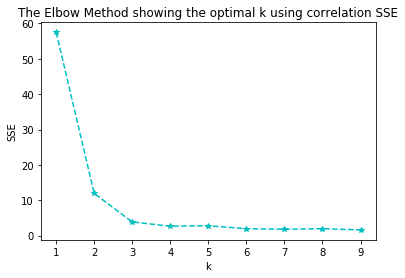

In [22]:
# k means determine k
print(deg_np.shape[0])
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(deg_np)
#     kmeanModel.fit(deg_np)
#     print(k+kmeanModel.cluster_centers_)
    distortions.append(sum(np.min(np.square(cdist(deg_np, kmeanModel.cluster_centers_,metric='correlation')), axis=1)))
    print("SSE for " +str(k)+" is "+str(sum(np.min(np.square(cdist(deg_np, kmeanModel.cluster_centers_,metric='correlation')), axis=1))))
# Plot the elbow
plt.plot(K, distortions,'c*--')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k using correlation SSE')
plt.show()

In [23]:
# print(silhouette_score(deg_np,labels=deg['Undergraduate.Major']))
print(silhouette_score(deg_np,labels=kmeans.labels_))
#  Values are between -1 and +1. The closer it is to 1 the better the clustering
# Compare silhouette score for different k values

0.473888543669


In [24]:
kmeans2 = KMeans(n_clusters=2, random_state=None).fit(deg_np)
k2_labels = kmeans2.labels_
print(k2_labels)
k2_labels_df = pd.DataFrame(k2_labels)
print(k2_labels_df.head())
print(k2_labels_df.shape)

[0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0
 0 0 1 1 1 0 0 0 0 1 1 1 1]
   0
0  0
1  0
2  1
3  1
4  0
(50, 1)


In [25]:
undergrad_major_df= pd.DataFrame(deg['Undergraduate.Major'])
print(undergrad_major_df.head())
print(undergrad_major_df.shape)

     Undergraduate.Major
0             Accounting
1  Aerospace Engineering
2            Agriculture
3           Anthropology
4           Architecture
(50, 1)


In [26]:
k2_labels_df['Undergrad Major'] = undergrad_major_df.iloc[:,0].values
k2_labels_df.head()

,0,Undergrad Major
0,0,Accounting
1,0,Aerospace Engineering
2,1,Agriculture
3,1,Anthropology
4,0,Architecture


In [27]:
# k2_labels_df.drop('undergrad',axis=1)

In [28]:
cluster2_withpercent = k2_labels_df
cluster2_withpercent.head()
cluster2_withpercent=cluster2_withpercent.rename(columns={0:'Label'})
cluster2_withpercent.head()

,Label,Undergrad Major
0,0,Accounting
1,0,Aerospace Engineering
2,1,Agriculture
3,1,Anthropology
4,0,Architecture


In [29]:
cluster2_withpercent['columns'] = cluster2_withpercent.groupby('Label')['Undergrad Major'].cumcount()
cluster2_withpercent.head()
# result = df.pivot(index='x', columns='columns')
# print(result)

,Label,Undergrad Major,columns
0,0,Accounting,0
1,0,Aerospace Engineering,1
2,1,Agriculture,0
3,1,Anthropology,1
4,0,Architecture,2


In [30]:
result = cluster2_withpercent.pivot(index='Label', columns='columns')
print(result)

        Undergrad Major                                       \
columns              0                      1             2    
Label                                                          
0            Accounting  Aerospace Engineering  Architecture   
1           Agriculture           Anthropology   Art History   

                                                                       \
columns                    3                    4                  5    
Label                                                                   
0        Chemical Engineering            Chemistry  Civil Engineering   
1                     Biology  Business Management     Communications   

                                                                          \
columns                    6                 7             8          9    
Label                                                                      
0        Computer Engineering  Computer Science  Construction  Economics   
1        

In [31]:
result

Undergrad Major                                       \
columns              0                      1             2    
Label                                                          
0            Accounting  Aerospace Engineering  Architecture   
1           Agriculture           Anthropology   Art History   

                                                                       \
columns                    3                    4                  5    
Label                                                                   
0        Chemical Engineering            Chemistry  Civil Engineering   
1                     Biology  Business Management     Communications   

                                                                          \
columns                    6                 7             8          9    
Label                                                                      
0        Computer Engineering  Computer Science  Construction  Economics   
1            Criminal Justice             Drama     Education    English   

          ...                                                          \
columns   ...                              17                      18   
Label     ...                                                           
0         ...                            Math  Mechanical Engineering   
1         ...     Information Technology (IT)         Interior Design   

                                                                      \
columns          19                   20       21                 22   
Label                                                                  
0        Philosophy  Physician Assistant  Physics  Political Science   
1        Journalism                Music  Nursing          Nutrition   

                                                   
columns          23        24         25       26  
Label                                              
0              None      None       None     None  
1        Psychology  Religion  Sociology  Spanish  

[2 rows x 27 columns]

In [32]:
flatt = pd.DataFrame(result.to_records())
for index, row in flatt.iterrows():
    print(row)

Label                                                         0
('Undergrad Major', 0)                               Accounting
('Undergrad Major', 1)                    Aerospace Engineering
('Undergrad Major', 2)                             Architecture
('Undergrad Major', 3)                     Chemical Engineering
('Undergrad Major', 4)                                Chemistry
('Undergrad Major', 5)                        Civil Engineering
('Undergrad Major', 6)                     Computer Engineering
('Undergrad Major', 7)                         Computer Science
('Undergrad Major', 8)                             Construction
('Undergrad Major', 9)                                Economics
('Undergrad Major', 10)                  Electrical Engineering
('Undergrad Major', 11)                                 Finance
('Undergrad Major', 12)                                 Geology
('Undergrad Major', 13)                  Industrial Engineering
('Undergrad Major', 14)                 

In [33]:
# Cluster 1 has 27 instances(54%) & cluster 2 has 23 instances(46%)
print("Euclidean score : "+str(silhouette_score(deg_np,labels=k2_labels,metric='euclidean')))
print("Manhattan score : "+str(silhouette_score(deg_np,labels=k2_labels,metric='manhattan')))

Euclidean score : 0.473888543669
Manhattan score : 0.496075114654


In [34]:
# k=3
kmeans3 = KMeans(n_clusters=3, random_state=None).fit(deg_np)
k3_labels = kmeans3.labels_
print(k3_labels)
k3_labels_df = pd.DataFrame(k3_labels)
print(k3_labels_df.head())
print(k3_labels_df.shape)
k3_labels_df['Undergrad Major'] = undergrad_major_df.iloc[:,0].values
print(k3_labels_df.head())
cluster3_withpercent = k3_labels_df
print(cluster3_withpercent.head())
cluster3_withpercent=cluster3_withpercent.rename(columns={0:'Label'})
print(cluster3_withpercent.head())
cluster3_withpercent['columns'] = cluster3_withpercent.groupby('Label')['Undergrad Major'].cumcount()
cluster3_withpercent.head()
result3 = cluster3_withpercent.pivot(index='Label', columns='columns')
result3

[2 1 2 0 2 0 0 2 1 2 1 2 1 1 1 0 0 1 0 1 0 2 2 0 0 2 0 0 2 0 1 2 0 2 2 2 2
 2 1 0 0 0 2 1 1 2 0 0 0 0]
   0
0  2
1  1
2  2
3  0
4  2
(50, 1)
   0        Undergrad Major
0  2             Accounting
1  1  Aerospace Engineering
2  2            Agriculture
3  0           Anthropology
4  2           Architecture
   0        Undergrad Major
0  2             Accounting
1  1  Aerospace Engineering
2  2            Agriculture
3  0           Anthropology
4  2           Architecture
   Label        Undergrad Major
0      2             Accounting
1      1  Aerospace Engineering
2      2            Agriculture
3      0           Anthropology
4      2           Architecture


Undergrad Major                                           \
columns                     0                     1                  2    
Label                                                                     
0                 Anthropology           Art History            Biology   
1        Aerospace Engineering  Chemical Engineering  Civil Engineering   
2                   Accounting           Agriculture       Architecture   

                                                                            \
columns                    3                 4               5          6    
Label                                                                        
0            Criminal Justice             Drama       Education    English   
1        Computer Engineering  Computer Science    Construction  Economics   
2         Business Management         Chemistry  Communications       Film   

                                                         \
columns                      7                       8    
Label                                                     
0                      Forestry               Geography   
1        Electrical Engineering  Industrial Engineering   
2                       Finance                 Geology   

                                                              \
columns                      9                            10   
Label                                                          
0                Graphic Design   Health Care Administration   
1        Mechanical Engineering          Physician Assistant   
2                       History  Information Technology (IT)   

                                                   \
columns                       11               12   
Label                                               
0          Hospitality & Tourism  Interior Design   
1                        Physics             None   
2        International Relations       Journalism   

                                                                     \
columns                                    13         14         15   
Label                                                                 
0                                       Music    Nursing  Nutrition   
1                                        None       None       None   
2        Management Information Systems (MIS)  Marketing       Math   

                                                            
columns          16                 17         18       19  
Label                                                       
0        Psychology           Religion  Sociology  Spanish  
1              None               None       None     None  
2        Philosophy  Political Science       None     None

In [35]:
# Cluster 1 has 20 instances(40%) & cluster 2 has 18 instances(36%) & cluster 3 has 12 instances (24%)
print("Euclidean score : "+str(silhouette_score(deg_np,labels=k3_labels,metric='euclidean')))
print("Manhattan score : "+str(silhouette_score(deg_np,labels=k3_labels,metric='manhattan')))

Euclidean score : 0.431739832714
Manhattan score : 0.457736060707


In [36]:
result3.reset_index()

Label        Undergrad Major                                           \
columns                            0                     1                  2   
0           0           Anthropology           Art History            Biology   
1           1  Aerospace Engineering  Chemical Engineering  Civil Engineering   
2           2             Accounting           Agriculture       Architecture   

                                                                            \
columns                     3                 4               5          6   
0            Criminal Justice             Drama       Education    English   
1        Computer Engineering  Computer Science    Construction  Economics   
2         Business Management         Chemistry  Communications       Film   

                                                          ...     \
columns                       7                       8   ...      
0                      Forestry               Geography   ...      
1        Electrical Engineering  Industrial Engineering   ...      
2                       Finance                 Geology   ...      

                                                               \
columns                           10                       11   
0         Health Care Administration    Hospitality & Tourism   
1                Physician Assistant                  Physics   
2        Information Technology (IT)  International Relations   

                                                                           \
columns               12                                    13         14   
0        Interior Design                                 Music    Nursing   
1                   None                                  None       None   
2             Journalism  Management Information Systems (MIS)  Marketing   

                                                                       
columns         15          16                 17         18       19  
0        Nutrition  Psychology           Religion  Sociology  Spanish  
1             None        None               None       None     None  
2             Math  Philosophy  Political Science       None     None  

[3 rows x 21 columns]

In [37]:
flatt = pd.DataFrame(result3.to_records())
# flattened.columns = [hdr.replace("('pills', ", "strength.").replace(")", "") \
#                      for hdr in flattened.columns]

In [38]:
flatt.head()

,Label,"('Undergrad Major', 0)","('Undergrad Major', 1)","('Undergrad Major', 2)","('Undergrad Major', 3)","('Undergrad Major', 4)","('Undergrad Major', 5)","('Undergrad Major', 6)","('Undergrad Major', 7)","('Undergrad Major', 8)",...,"('Undergrad Major', 10)","('Undergrad Major', 11)","('Undergrad Major', 12)","('Undergrad Major', 13)","('Undergrad Major', 14)","('Undergrad Major', 15)","('Undergrad Major', 16)","('Undergrad Major', 17)","('Undergrad Major', 18)","('Undergrad Major', 19)"
0,0,Anthropology,Art History,Biology,Criminal Justice,Drama,Education,English,Forestry,Geography,...,Health Care Administration,Hospitality & Tourism,Interior Design,Music,Nursing,Nutrition,Psychology,Religion,Sociology,Spanish
1,1,Aerospace Engineering,Chemical Engineering,Civil Engineering,Computer Engineering,Computer Science,Construction,Economics,Electrical Engineering,Industrial Engineering,...,Physician Assistant,Physics,None,None,None,None,None,None,None,None
2,2,Accounting,Agriculture,Architecture,Business Management,Chemistry,Communications,Film,Finance,Geology,...,Information Technology (IT),International Relations,Journalism,Management Information Systems (MIS),Marketing,Math,Philosophy,Political Science,None,None


In [39]:
flatt.iloc[0,:].value_counts()

Interior Design               1
Drama                         1
Music                         1
Psychology                    1
Nursing                       1
Spanish                       1
Criminal Justice              1
English                       1
Hospitality & Tourism         1
Sociology                     1
Graphic Design                1
Forestry                      1
Art History                   1
Education                     1
Biology                       1
Health Care Administration    1
Religion                      1
Geography                     1
Nutrition                     1
Anthropology                  1
0                             1
Name: 0, dtype: int64